# Plotting reachable targets

This script creates a plot of all flyable points in a range of 900 metres for a small unmanned glider. The lauching point is in the centre of the plot. The flyable targets are depicted as blue dots and the not reachable targets are depicted as blue crosses.

<IPython.core.display.Javascript object>


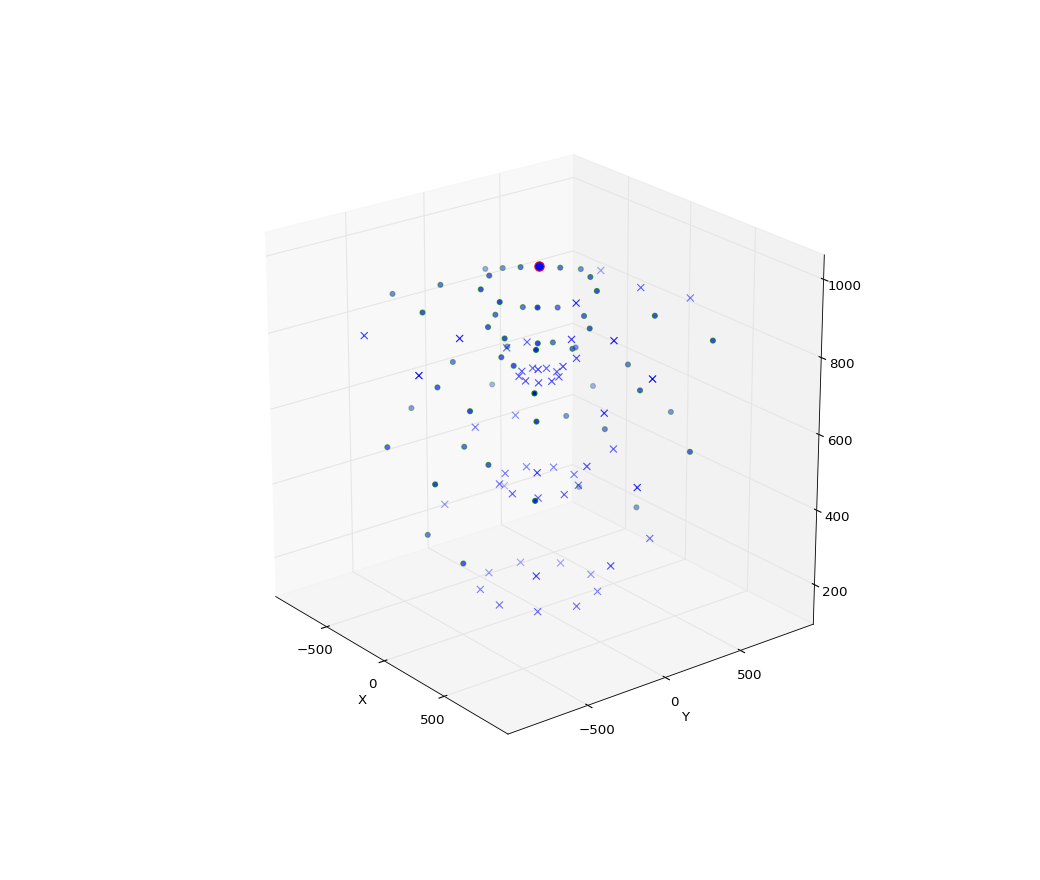

In [42]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

printInfo = False

def rmv(a):
    order = np.lexsort(a.T)
    a = a[order]
    diff = np.diff(a, axis=0)
    ui = np.ones(len(a), 'bool')
    ui[1:] = (diff != 0).any(axis=1) 
    return a[ui]

#read all generated points
f1 = open('../LinearisedModel/Results/listOfPointsClassInst.dat', 'r')
allPoints = f1.read().split()
points = []
for i in range(0,len(allPoints)//3): 
    points.append([allPoints[3*i], allPoints[3*i+1], allPoints[3*i+2]])    
points = np.array(points,dtype=np.float64)

#print all points
if (printInfo):
    print ("size points file"), len(points)
    for line in points:
        print (line)

#remove repeated depots
points = rmv(points)
if (printInfo):
    print ("after removing multi depots ", len(points))
    for line in points:
        print (line)

#read list of infeasible points
f2 = open('../LinearisedModel/Results/infeasibleInstances.out', 'r')
infeasible = []
for line in f2:
    line =  line.rstrip('\n')
    line =  line.split('_')
    infeasible.append([line[1],line[2],line[3]])
infeasible = np.array(infeasible,dtype=np.float64)

if (printInfo):
    print ("infeasible instances", len(infeasible))
    for line in infeasible:
        print (line)

if (printInfo):
    print ('Removing infeasible from list of points:')
for i in infeasible:
    idx = 0
    for p in points:
        if np.sqrt((i[0]-p[0])**2 + (i[1]-p[1])**2 + (i[2]-p[2])**2) < 0.1:
            points = np.delete(points,(idx),axis=0)
            if (printInfo):
                print (p)
        idx = idx + 1

#sort points based on 3rd column in descending order
points = points[points[:,2].argsort()][::-1]
if (printInfo):
    print ('New Array', len(points))
    for l in points:
        print (l)

#remove top unreachable targets
launching_height = points[0,2]
temp = []
for t in range(0,len(infeasible)):
    if  infeasible[t][2] < launching_height:
        temp.append(infeasible[t])
infeasible = np.array(temp,dtype=np.float64)

#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[1:,0],points[1:,1],points[1:,2],color="green",s=20)
ax.scatter(points[0,0],points[0,1],points[0,2],color="red",s=70)
ax.axis('tight')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.rcParams['figure.figsize'] = 13,11
plt.show()
